In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# importing train_test_split model
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# label encoding
le = LabelEncoder()

In [8]:
df[['sex', 'smoker','region']] = df[['sex', 'smoker','region']].apply(le.fit_transform)

In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [10]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


normalized_df=(df-df.mean())/df.std()

In [11]:
Y = df.pop('charges')

In [12]:
df.describe()

,age,sex,bmi,children,smoker,region
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000


In [13]:
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.3)

In [14]:
X_test

,age,sex,bmi,children,smoker,region
482,18,0,31.350,0,0,2
6,46,0,33.440,1,0,2
566,38,0,40.565,1,0,1
35,19,1,20.425,0,0,1
437,35,1,28.900,3,0,3
...,...,...,...,...,...,...
430,19,1,33.100,0,0,3
1304,42,1,24.605,2,1,0
868,61,1,23.655,0,0,0
1310,42,1,26.315,1,0,1


In [15]:
y_test

482      1622.18850
6        8240.58960
566      6373.55735
35       1625.43375
437      5926.84600
           ...     
430     23082.95533
1304    21259.37795
868     13129.60345
1310     6940.90985
1235     2699.56835
Name: charges, Length: 402, dtype: float64

In [16]:
from sklearn import preprocessing
scaler_x = preprocessing.StandardScaler().fit(X_train)

In [88]:
X_train

,age,sex,bmi,children,smoker,region
889,57,1,33.630,1,0,1
17,23,1,23.845,0,0,0
298,31,1,34.390,3,1,1
545,49,1,25.840,2,1,1
1038,22,1,28.880,0,0,0
...,...,...,...,...,...,...
1077,21,1,26.030,0,0,0
826,56,1,31.790,2,1,2
622,49,0,21.300,1,0,3
893,47,1,38.940,2,1,2


In [82]:
scaler_x.mean_

array([39.23611111,  0.49786325, 30.61799679,  1.09294872,  0.19978632,
        1.47970085])

In [83]:
scaler_x.var_

array([1.97000875e+02, 2.49995434e-01, 3.62078891e+01, 1.44328361e+00,
       1.59871749e-01, 1.24745119e+00])

In [ ]:
X_scaled = scaler_x.transform(X_train)

In [93]:
X_scaled[935]

array([-0.08806907,  1.00428267,  0.06348416, -0.0773691 , -0.49966611,
        1.36118536])

In [ ]:
X_scaled[935]

In [22]:
X_te_scaled = scaler_x.transform(X_test)

In [23]:
X_te_scaled

array([[ 0.05442471,  1.00428267,  0.77809048,  1.58740057, -0.49966611,
         1.36118536],
       [ 0.69564673,  1.00428267,  1.14536489,  0.75501573, -0.49966611,
         0.46584488],
       [ 0.90938741, -0.99573559,  2.34025313,  1.58740057, -0.49966611,
         1.36118536],
       ...,
       [-0.44430353,  1.00428267,  1.9679931 , -0.0773691 , -0.49966611,
         0.46584488],
       [-1.51300691, -0.99573559,  0.08508854, -0.90975394, -0.49966611,
         0.46584488],
       [ 1.47936254,  1.00428267, -1.04664844, -0.90975394, -0.49966611,
        -0.42949559]])

In [24]:
y_train = np.reshape(y_train.values, (-1,1))
scaler_y = preprocessing.StandardScaler().fit(y_train)

In [25]:
scaler_y.mean_

array([13092.01280714])

In [26]:
scaler_y.var_

array([1.43451672e+08])

In [27]:
y_scaled = scaler_y.transform(y_train)

In [28]:
y_test = np.reshape(y_test.values, (-1,1))
y_te_scaled = scaler_y.transform(y_test)

In [29]:
regressor = keras.Sequential()
regressor.add(layers.InputLayer(input_shape=(6,)))
regressor.add(layers.Dense(units=64,activation = 'relu'))
regressor.add(layers.Dense(units=1,activation='linear'))
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
results=regressor.fit(X_scaled,y_scaled,epochs = 400)

Train on 936 samples
Epoch 1/400
936/936 [==============================] - 1s 851us/sample - loss: 0.6669
Epoch 2/400
936/936 [==============================] - 0s 65us/sample - loss: 0.3842
Epoch 3/400
936/936 [==============================] - 0s 68us/sample - loss: 0.2575
Epoch 4/400
936/936 [==============================] - 0s 68us/sample - loss: 0.2057
Epoch 5/400
936/936 [==============================] - 0s 56us/sample - loss: 0.1854
Epoch 6/400
936/936 [==============================] - 0s 78us/sample - loss: 0.1727
Epoch 7/400
936/936 [==============================] - 0s 80us/sample - loss: 0.1651
Epoch 8/400
936/936 [==============================] - ETA: 0s - loss: 0.176 - 0s 87us/sample - loss: 0.1584
Epoch 9/400
936/936 [==============================] - 0s 68us/sample - loss: 0.1545
Epoch 10/400
936/936 [==============================] - 0s 63us/sample - loss: 0.1519
Epoch 11/400
936/936 [==============================] - 0s 79us/sample - loss: 0.1482
Epoch 12/400
936/

936/936 [==============================] - 0s 93us/sample - loss: 0.1124
Epoch 189/400
936/936 [==============================] - 0s 85us/sample - loss: 0.1122
Epoch 190/400
936/936 [==============================] - 0s 87us/sample - loss: 0.1107
Epoch 191/400
936/936 [==============================] - 0s 86us/sample - loss: 0.1125
Epoch 192/400
936/936 [==============================] - 0s 75us/sample - loss: 0.1102
Epoch 193/400
936/936 [==============================] - 0s 74us/sample - loss: 0.1102
Epoch 194/400
936/936 [==============================] - 0s 55us/sample - loss: 0.1102
Epoch 195/400
936/936 [==============================] - 0s 92us/sample - loss: 0.1103
Epoch 196/400
936/936 [==============================] - 0s 97us/sample - loss: 0.1101
Epoch 197/400
936/936 [==============================] - 0s 79us/sample - loss: 0.1102
Epoch 198/400
936/936 [==============================] - 0s 62us/sample - loss: 0.1102
Epoch 199/400
936/936 [==============================] - 

936/936 [==============================] - 0s 54us/sample - loss: 0.1021
Epoch 376/400
936/936 [==============================] - 0s 65us/sample - loss: 0.1014
Epoch 377/400
936/936 [==============================] - 0s 50us/sample - loss: 0.1007
Epoch 378/400
936/936 [==============================] - 0s 71us/sample - loss: 0.1006
Epoch 379/400
936/936 [==============================] - ETA: 0s - loss: 0.069 - 0s 52us/sample - loss: 0.1013
Epoch 380/400
936/936 [==============================] - 0s 54us/sample - loss: 0.1024
Epoch 381/400
936/936 [==============================] - 0s 56us/sample - loss: 0.1022
Epoch 382/400
936/936 [==============================] - 0s 55us/sample - loss: 0.1013
Epoch 383/400
936/936 [==============================] - 0s 53us/sample - loss: 0.1006
Epoch 384/400
936/936 [==============================] - 0s 52us/sample - loss: 0.1019
Epoch 385/400
936/936 [==============================] - 0s 54us/sample - loss: 0.1009
Epoch 386/400
936/936 [==========

In [31]:
y_pred= regressor.predict(X_te_scaled)

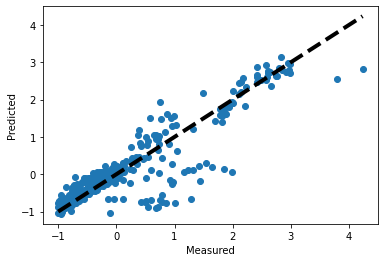

In [32]:
fig, ax = plt.subplots()
ax.scatter(y_te_scaled, y_pred)
ax.plot([y_te_scaled.min(), y_te_scaled.max()], [y_te_scaled.min(), y_te_scaled.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [94]:
Xnew = np.array([[44,1,27.4,2,0,2]])

In [95]:
Xnew= scaler_x.transform(Xnew)
print(Xnew)
ynew= regressor.predict(Xnew)
print(ynew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

[[ 0.33941228  1.00428267 -0.53479089  0.75501573 -0.49966611  0.46584488]]
[[-0.2707704]]
X=[44.   1.  27.4  2.   0.   2. ], Predicted=[9848.96]


In [35]:
ynew = np.array([[1]])

In [36]:
ynew[0][0]

1

In [37]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(regressor)
tflite_model = converter.convert()

# Save the TF Lite model.
open('ml_model.tflite', 'wb').write(tflite_model)

3116

In [38]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [39]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [77]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array([[  0.33941228, 1.00428267, -0.53479089,  0.75501573, -0.49966611,  1.36118536]], dtype = 'float32')
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.


In [78]:
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [79]:
tf_results = regressor.predict(input_data)

In [80]:
tf_results

array([[-0.35723656]], dtype=float32)

In [81]:
tflite_results

array([[-0.35723653]], dtype=float32)